## Sky Localizations of Gravitational-Wave Events
Tutorial 2.6.1: skymap visualization/comparison and cross-matching a galaxy catalog.

In this tutorial we will learn how:

1. to visualize and compare the sky localizations,

2. to cross-match a gravitational-wave sky localization with a galaxy catalog.

## Sky localizations and interforometer network.
Here we show the importance in construction a network of interferometers for pinpointing the gravitational-wave source localizations over the sky. The case of GW190814 will be examined.

### Real time improving of the sky localizations of GW190814
GW190814 was first identified on 2019 August 14, 21:11:00 UTC as a loud two-detector event in LIGO Livingston and Virgo data (S/N 21.4 and 4.3). A [Notice](https://gcn.gsfc.nasa.gov/notices_l/S190814bv.lvc) was issued through NASA's Gamma-ray Coordinates Network 20 minutes later with a two-detector source localization computed using the rapid Bayesian algorithm BAYESTAR ([Singer & Price 2016](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.93.024013)).

Shortly thereafter, reanalyses including LIGO Hanford data were performed. A coincident gravitational-wave signal was identified in all three detectors. Results of these three-detector analyses were reported in the [GCN Circular 25324](https://gcn.gsfc.nasa.gov/gcn3/25324.gcn3) within 2.3 hr of the time of the event providing a three-detector localization [LIGO Scientific Collaboration & Virgo Collaboration 2019](https://iopscience.iop.org/article/10.3847/2041-8213/ab960f).

We will apply the method [`ligo_skymap_contour_moc`](https://lscsoft.docs.ligo.org/ligo.skymap/tool/ligo_skymap_contour_moc.html) from [`ligo.skymap`](https://lscsoft.docs.ligo.org/ligo.skymap/) to create the 90% credible regions for the two-detector and three-detector sky localizations. 

In [1]:
# Download the two-detector sky map of GW190814 from GraceDB.
!curl -O https://gracedb.ligo.org/api/superevents/S190814bv/files/bayestar.multiorder.fits,0
    
# Define the 90% credible region of two-detector source localization.
!ligo-skymap-contour-moc bayestar.multiorder.fits,0  -c 90  --output 'GW190814 with 2 IFO'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  759k  100  759k    0     0   271k      0  0:00:02  0:00:02 --:--:--  270k
2021-04-15 12:31:45,939 WARNING Matplotlib created a temporary config/cache directory at /var/folders/5n/cq85zsfj29q5_nvkjg9l0b4c0000gn/T/matplotlib-lqer08lf because the default path (/Users/gius/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
2021-04-15 12:31:46,241 INFO Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
2021-04-15 12:31:46,259 INFO Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
2021-04-1

In [2]:
# Download the three-detector sky map of GW190814 from GraceDB.
!curl -O https://gracedb.ligo.org/api/superevents/S190814bv/files/bayestar.multiorder.fits
    
# Define the 90% credible region of three-detector source localization.
!ligo-skymap-contour-moc bayestar.multiorder.fits  -c 90  --output 'GW190814 with 3 IFO'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  759k  100  759k    0     0   305k      0  0:00:02  0:00:02 --:--:--  305k
2021-04-15 12:31:51,002 WARNING Matplotlib created a temporary config/cache directory at /var/folders/5n/cq85zsfj29q5_nvkjg9l0b4c0000gn/T/matplotlib-nrkljeoc because the default path (/Users/gius/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
2021-04-15 12:31:51,281 INFO Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (error code 0x17)
2021-04-15 12:31:51,337 INFO Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (error code 0

In [3]:
# Initialize an Aladin widget at a defined sky's position and with the DSS color survey.
import ipyaladin as ipyal

aladin = ipyal.Aladin(target='16.91000 -28.1100', fov=180, survey='P/DSS2/color')
aladin

Aladin(fov=180.0, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', '…

In [4]:
# Show the two credible regions in the Aladin widget with 2 different colors.
colors = ["magenta", "yellow"]

credible_regions = ["GW190814 with 2 IFO", "GW190814 with 3 IFO"]

for credible_region, color in zip(credible_regions, colors):
    aladin.add_moc_from_URL(credible_region, {'color': color, 'opacity': 0.7,
                            'adaptativeDisplay': False, 'name':credible_region})

Scroll up and visualize the credible region contours in the interactive Aladin widget. From the `Manage Layers`, <img src="images/ipyaladin_layer.png" alt="the Layer Button" style="width:30px; display: inline-block;"/> the 2 credible regions can be independently selected. 

If you hover the mouse pointer over the credible region plan a message will be displayed above it to show the coverage in sky percentage. How many square degrees? How refined the localization is?

## Cross-Matching the sky localization with a Galaxy Catalog
All sky localization for CBC (Compact Binary Coalescence) events are three dimensional: they include both the sky probability map (as shown above) and a directionally dependent distance estimate. This can be useful for identifying possible host galaxies using a galaxy redshift catalog.

Using the [`crossmatch`](https://lscsoft.docs.ligo.org/ligo.skymap/postprocess/crossmatch.html) method in [`ligo.skymap`](https://lscsoft.docs.ligo.org/ligo.skymap/) package, we can extract the galaxies within the 90% credible volume. The galaxy table will be showed in the previous Aladin widget as a new overlay layer.

In [5]:
from astroquery.vizier import VizierClass
from astropy.coordinates import SkyCoord
from ligo.skymap.io import read_sky_map
from ligo.skymap.postprocess import crossmatch

Matplotlib created a temporary config/cache directory at /var/folders/5n/cq85zsfj29q5_nvkjg9l0b4c0000gn/T/matplotlib-70d6i73v because the default path (/Users/gius/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Now we retrieve the GLADE catalog.

**NOTE**. To keep the MyBinder memory, we load a verified subsample from the GLADE catalog.
For real applications, download the entire [GLADE](https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=VII/281) catalog.

In [6]:
# For real application, uncomment the lines below to load the entire GLADE catalog.

#vizier = VizierClass(
#    row_limit=-1, columns=['GWGC', '_RAJ2000', '_DEJ2000', 'Dist'])
#cat, = vizier.get_catalogs('VII/281/glade2')

In [7]:
# Comment this line in real application. We use this to save MyBinder memory.
from astropy.table import Table
cat = Table.read('https://github.com/ggreco77/Tutotest/blob/main/resources/table_tuto?raw=true')

In [8]:
# Get coordinates and distance columns.
coordinates = SkyCoord(cat['_RAJ2000'], cat['_DEJ2000'], cat['Dist'])

In [9]:
# Read the initial GW190814 skymap with 3 IFO.
skymap = read_sky_map('bayestar.multiorder.fits', moc=True)

# List the galaxies within the 90% credible volume.
result = crossmatch(skymap, coordinates)
table = cat[result.searched_prob_vol < 0.9]

Next, we get the **dP_dV**; these values rapresent the probability per volume occupied by each galaxy.

In [10]:
keep = (result.searched_prob_vol < 0.9)
table = cat[keep]
table['dP-dV'] = result.probdensity_vol[keep]

In [11]:
# Add the galaxy list in the previous Aladin widget.
aladin.add_table(table)

How many galaxies within the 90% probability volume? (Suggetion: use the `Manage Layers`, <img src="images/ipyaladin_layer.png" alt="the Layer Button" style="width:30px; display: inline-block;"/>

## Challenge: GW

GW170817 was another good example on how rapid and accurate sky localization can help for multimessenger astronomy. GW170817 was observed from the merger of a binary neutron star on August 17, 2017 at 12:41:04 UTC by the LIGO and Virgo detectors.

In this challenge we will ask you to:

1) Download the sky localizations for the [two LIGO detectors](https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz) and for the [LIGO and Virgo detectors](https://dcc.ligo.org/public/0146/G1701985/001/LALInference_v2.fits.gz). Can you comment on which sky localization is better? Why?

2) GW170817 merged in the NGC4993 galaxy, in the Hydra constellation. The hosting galaxy of the event was identified thanks to the [electromagnetic counterpart of GW170817](https://dcc.ligo.org/LIGO-P1700294/public). However, even with a GW alone and good sky localization we can identify the hosting galaxy. Use the following python snippet to get all the galaxies within 20 deg from NGC4993. Using the 2 detectors skymap, how many galaxies you find in the 90% CL sky localization? If you use the 3 detectors skymap?

```
from astroquery.vizier import Vizier
import astropy.units as u
Vizier.ROW_LIMIT = -1

cat = Vizier.query_region(SkyCoord.from_name('NGC4993'),
                          radius=20*u.deg, catalog='VII/281/glade2')['VII/281/glade2']
```

3) Using the two set of galaxies from the point 2), can you tell us the cosmological redshift at which GW170817 merged? (suggestion: You can histogram the distribution of the redshift of galaxies in the 90% CL). *Note*: Consider that the cosmological redshift of NGC4993 is around 0.0099, which sky localization gives the best result?.

4) How many years ago GW170817 merged? To calculate the time of emission, you can use the following python code, where `redshift_GW170817` is the cosmological redshift of GW170817 (sueggestion: this can be the redshift of the galaxies from point 3)

```
from astropy.cosmology import Planck15

time_merger = Planck15.lookback_time(redshift_GW170817)
print(time_merger)
```



In [ ]:
## Solution below

In [12]:
# Download the two-detector sky map of GW170817 from the DCC.
!curl -O https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz
    
# Define the 90% credible region of two-detector source localization.
!ligo-skymap-contour-moc bayestar_no_virgo.fits.gz  -c 90  --output 'GW170817 with 2 detectors'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1592k  100 1592k    0     0   603k      0  0:00:02  0:00:02 --:--:--  603k


In [13]:
# Download the three-detector sky map of GW170817 from the DCC.
!curl -O https://dcc.ligo.org/public/0146/G1701985/001/LALInference_v2.fits.gz
    
# Define the 90% credible region of three-detector source localization.
!ligo-skymap-contour-moc LALInference_v2.fits.gz  -c 90  --output 'GW170817 with 3 detectors'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1492k  100 1492k    0     0   530k      0  0:00:02  0:00:02 --:--:--  530k


In [14]:
# Initialize an Aladin widget at a defined sky's position and with the DSS color survey.
import ipyaladin as ipyal

aladin = ipyal.Aladin(target='205.55 -42.63', fov=180, survey='P/DSS2/color')
aladin

Aladin(fov=180.0, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', '…

In [15]:
# Show the two credible regions in the Aladin widget with 2 different colors.
colors = ["magenta", "yellow"]

credible_regions = ['GW170817 with 2 detectors','GW170817 with 3 detectors']

for credible_region, color in zip(credible_regions, colors):
    aladin.add_moc_from_URL(credible_region, {'color': color, 'opacity': 0.7,
                            'adaptativeDisplay': False, 'name':credible_region})

In [16]:
# We use the snippet from the question to get all the galaxies in a 60 deg radius from GW170817

from astroquery.vizier import Vizier
import astropy.units as u
from astropy.coordinates import SkyCoord
Vizier.ROW_LIMIT = -1

cat = Vizier.query_region(SkyCoord.from_name('NGC4993'),
                          radius=40*u.deg, catalog='VII/281/glade2')['VII/281/glade2']


In [17]:
# Get coordinates and distance columns.
import numpy as np
coordinates = SkyCoord(cat['RAJ2000'], cat['DEJ2000'], cat['Dist'])

In [18]:
# Read the initial GW170817 skymap with  IFO.
skymap = read_sky_map('bayestar_no_virgo.fits.gz',moc=True)

# List the galaxies within the 90% credible volume.
result = crossmatch(skymap, coordinates)
cat_2d = cat[result.searched_prob_vol < 0.90]

# Add the galaxy list in the previous Aladin widget.
aladin.add_table(cat_2d)

print('There are {:d} galaxies in the 2 detectors sky localization'.format(len(cat_2d)))

# Read the initial GW170817 skymap with  IFO.
skymap = read_sky_map('LALInference_v2.fits.gz',moc=True)

# List the galaxies within the 90% credible volume.
result = crossmatch(skymap, coordinates)
cat_3d = cat[result.searched_prob_vol < 0.90]

# Add the galaxy list in the previous Aladin widget.
aladin.add_table(cat_3d)

print('There are {:d} galaxies in the 3 detectors sky localization'.format(len(cat_3d)))



There are 105 galaxies in the 2 detectors sky localization
There are 32 galaxies in the 3 detectors sky localization


With two detectors GW170817 is at redshift 0.008152 +/- 0.003448
With two detectors GW170817 is at redshift 0.010035 +/- 0.003135


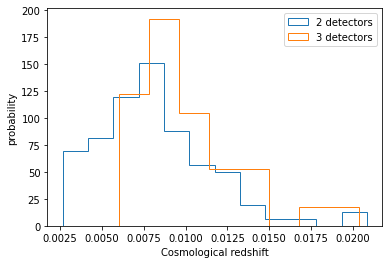

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(cat_2d['z'],bins='auto',density=True,label='2 detectors',histtype='step')
plt.hist(cat_3d['z'],bins='auto',density=True,label='3 detectors',histtype='step')
plt.xlabel('Cosmological redshift')
plt.ylabel('probability')
plt.legend()
print('With two detectors GW170817 is at redshift {:f} +/- {:f}'.format(np.mean(cat_2d['z']),np.std(cat_2d['z'])))
print('With two detectors GW170817 is at redshift {:f} +/- {:f}'.format(np.mean(cat_3d['z']),np.std(cat_3d['z'])) )

In [20]:
from astropy.cosmology import Planck15

time_merger_2d = Planck15.lookback_time(cat_2d['z'])
time_merger_3d = Planck15.lookback_time(cat_3d['z'])

print('With two detectors GW170817 is at redshift {:f} +/- {:f}'.format(np.mean(time_merger_2d),np.std(time_merger_2d)))
print('With two detectors GW170817 is at redshift {:f} +/- {:f}'.format(np.mean(time_merger_3d),np.std(time_merger_3d)) )

With two detectors GW170817 is at redshift 0.116843 Gyr +/- 0.049056 Gyr
With two detectors GW170817 is at redshift 0.143697 Gyr +/- 0.044459 Gyr
